¡Holaaaaaa! 

En esta ocasión vamos a trabajar con una [API Financiera](https://financialmodelingprep.com/developer/docs)

La razón de este proyecto es mostrarles una manera rapida de analizar empresas desde el lado cuantitativo/descriptivo. He pasado el ultimo año desarrollando modelos financieros, soy un "hobbyista" de las finanzas. Siempre me intereso el mundo de las finanzas corporativas y las valuaciones como un mero pasatiempo.

![png](/img/financial_api/modelo1.png)

![png](/img/financial_api/modelo2.png)

![png](/img/financial_api/modelo3.png)

![png](/img/financial_api/modelo4.png)

Se el dolor y el amor que uno puede sentir al buscar datos financieros dentro de un reporte anual K10. Por eso hice este proyecto. Hay maneras mas rapidas de sacar datos financieros, inclusve para no analizarlos con Python si no guardarlos y tu manipularlos con la herramienta que mas te gusta (como Excel).

--- 

Pero primero, ¿que es una API?

Una API es una interfaz que ofrece un servicio de comunicación. A diferencia de una UI (interfaz de usuario) que conecta a una persona con una computadora, una API conecta computadoras o software entre ellos mismos.

Estan hechas de diferentes partes que actuan como herramientas o servicios. Un programador puede llamar a uno de estos servicios a traves de metodos, requests o endpoints que estan definidas en las espicificaciones de una API. 

Pero la API como tal no es practica de usar, debe diseñarse a través de una arquitectura llamada REST que ayuda a manejar la información. 

REST fue propuesta por Roy Thomas en un paper titulado " Architectural Styles and the Design of Network-based Software Architectures", y una idea basica detras de REST es tratar a los datos como objetos que puedes llamar, crear o destruir y a través de metodos y que son representados en formato JSON, XML o RDF. 

| Metodo | Descripcion |
| ----------- | ----------- |
| GET | Trae informacion  |
| POST | Crea informacion | 
| PUT | Actualiza informacion |
| DELETE | Borra informacion | 

[Como explicarle REST a tu esposa](http://www.looah.com/source/view/2284)


Esto es justo lo que haremos ahora. Imaginemos a una API Rest como un ente que nos ayuda a traer datos desde una base externa. Nuestra computadora necesita comunicarse con otra y REST es la mejor forma de hacerlo.

¡Es hora de empezar!


In [2]:
import requests 
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
### Este codigo establece la anchura y la altura de los plots (bastante util) ###
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

Utilizaremos el modulo **requests** para enviar pedimentos HTTP de manera sencilla. 

HTTP o Hypertext Transfer Protocol es un protocolo Request-Response (pedido y respuesta) cuya funcion principal es establecer una comunicación entre sistemas de la Internet que conforman el World Wide Web (WWW).

Fue diseñado y creado para ser un puente entre los clientes y servidores. Este "puente" tiene metodos definidos que indican acciones deseadas por parte de un cliente hacia un recurso especifico. Lo que el recurso represente depende de lo que se implemento en el servidor. 

Basicamente REST es la manera en que HTTP se debe usar.


Hay 3 reglas que se deben seguir para usar una API REST.
      1. Definir el metodo
      2. Definir los parametros
      3. Hacer el request

Definiendo los dos primeros obtienes una respuesta especifica del servidor. Entonces, lo que yo quiero hacer es implementar un metodo GET para OBTENER datos.

In [3]:
# Estos son los parametros que necesita la API para entender lo que quieres
api_key = '27ae1dd809036202bcf78ee64609eb76'
company = "NVDA"
years = 5

# Y estes es el request que se logra hacer de manera sencilla gracias al package Requests.
r = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')
data = r.json()
print(data)
# Con esto obtenemos una respuesta con una estructura de tipo LISTA con formato JSON desde el servidor.

[{'date': '2021-01-31', 'symbol': 'NVDA', 'reportedCurrency': 'USD', 'fillingDate': '2021-02-26', 'acceptedDate': '2021-02-26 17:03:14', 'period': 'FY', 'revenue': 16675000000, 'costOfRevenue': 6279000000, 'grossProfit': 10396000000, 'grossProfitRatio': 0.623448275862069, 'researchAndDevelopmentExpenses': 3924000000, 'generalAndAdministrativeExpenses': 0.0, 'sellingAndMarketingExpenses': 0.0, 'sellingGeneralAndAdministrativeExpenses': 1940000000, 'otherExpenses': 0.0, 'operatingExpenses': 5864000000, 'costAndExpenses': 12143000000, 'interestExpense': 184000000, 'depreciationAndAmortization': 1098000000, 'ebitda': 5691000000, 'ebitdaratio': 0.34128935532233884, 'operatingIncome': 4532000000, 'operatingIncomeRatio': 0.271784107946027, 'totalOtherIncomeExpensesNet': 123000000, 'incomeBeforeTax': 4409000000, 'incomeBeforeTaxRatio': 0.26440779610194903, 'incomeTaxExpense': 77000000, 'netIncome': 4332000000, 'netIncomeRatio': 0.25979010494752625, 'eps': 1.7245222929936306, 'epsdiluted': 1.72

### Transformando y limpiando los datos

¡Pandas nos permite transformar JSONs de una manera super sencilla! 

In [9]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   fillingDate                              5 non-null      object 
 4   acceptedDate                             5 non-null      object 
 5   period                                   5 non-null      object 
 6   revenue                                  5 non-null      int64  
 7   costOfRevenue                            5 non-null      int64  
 8   grossProfit                              5 non-null      int64  
 9   grossProfitRatio                         5 non-null      float64
 10  researchAndDevelopmentExpenses           5 non-null   

Ya tenemos nuestro dataframe. Es hora de quitar algunas columnas y buscar valores nulos.

In [10]:
df = df.drop(columns=['reportedCurrency', 
                      'fillingDate', 
                      'acceptedDate', 
                      'period', 
                      'link', 
                      'finalLink', 
                      'symbol', 
                      'grossProfitRatio', 
                      'incomeBeforeTaxRatio', 
                      'netIncomeRatio', 
                      'eps', 
                      'epsdiluted'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   revenue                                  5 non-null      int64  
 2   costOfRevenue                            5 non-null      int64  
 3   grossProfit                              5 non-null      int64  
 4   researchAndDevelopmentExpenses           5 non-null      int64  
 5   generalAndAdministrativeExpenses         5 non-null      float64
 6   sellingAndMarketingExpenses              5 non-null      float64
 7   sellingGeneralAndAdministrativeExpenses  5 non-null      int64  
 8   otherExpenses                            5 non-null      float64
 9   operatingExpenses                        5 non-null      int64  
 10  costAndExpenses                          5 non-null   

In [14]:
df = df.sort_values("date")

In [15]:
df[["revenue", "costOfRevenue"]] = df[["revenue", "costOfRevenue"]] / 1000000000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 4 to 0
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   revenue                                  5 non-null      float64
 2   costOfRevenue                            5 non-null      float64
 3   grossProfit                              5 non-null      int64  
 4   researchAndDevelopmentExpenses           5 non-null      int64  
 5   generalAndAdministrativeExpenses         5 non-null      float64
 6   sellingAndMarketingExpenses              5 non-null      float64
 7   sellingGeneralAndAdministrativeExpenses  5 non-null      int64  
 8   otherExpenses                            5 non-null      float64
 9   operatingExpenses                        5 non-null      int64  
 10  costAndExpenses                          5 non-null   

¡Listo! Veamos a lo que me refiero

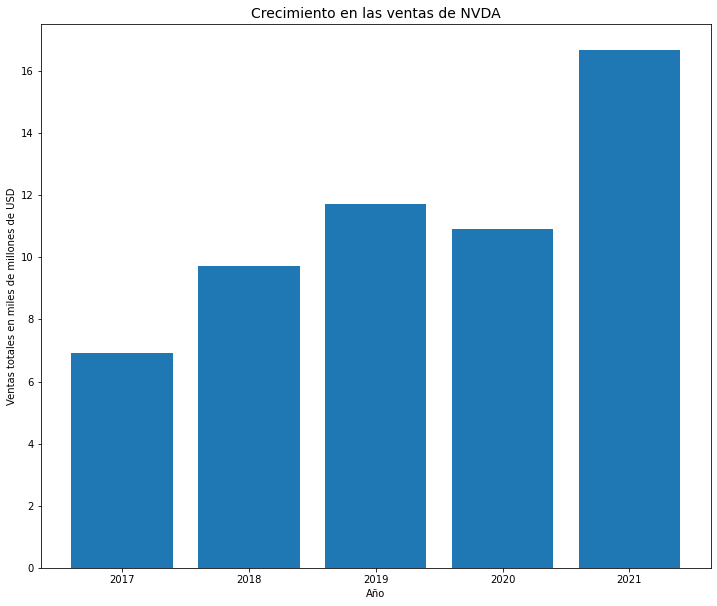

In [17]:
plt.bar(df['date'], df['revenue'])
plt.title('Crecimiento en las ventas de NVDA', fontsize=14)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Ventas totales en miles de millones de USD', fontsize=10)
plt.xticks(df['date'],['2017', '2018', '2019', '2020', '2021'])
plt.show()

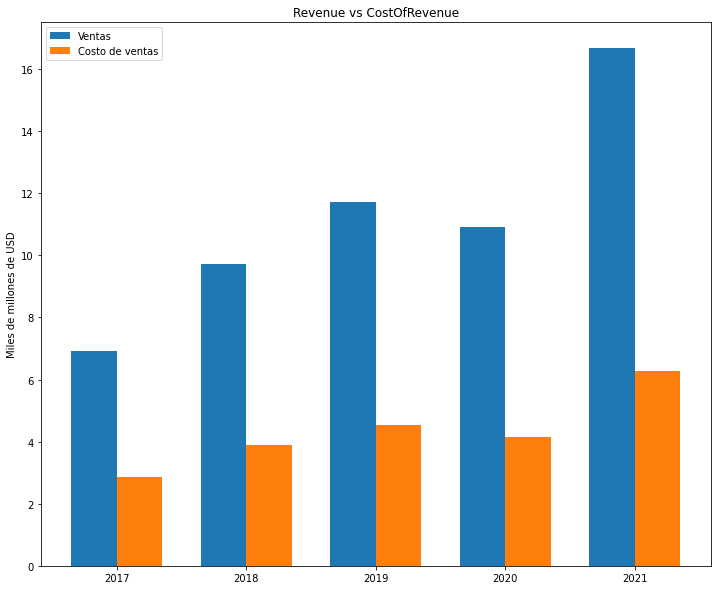

In [18]:
### Localizando los datos

descripcion = ['2017', '2018', '2019', '2020', '2021']
revenue = df["revenue"]
costOfRevenue = df["costOfRevenue"]

### Recorriendo la descripcion

x = np.arange(len(descripcion)) 
width = 0.35  

### Configurando los plots

fig, ax = plt.subplots()
plot1 = ax.bar(x - width/2, revenue, width, label='Ventas')
plot2 = ax.bar(x + width/2, costOfRevenue, width, label='Costo de ventas')

### Añadiendo la descripcion
ax.set_ylabel('Miles de millones de USD')
ax.set_title('Revenue vs CostOfRevenue')
ax.set_xticks(x)
ax.set_xticklabels(descripcion)
ax.legend()


plt.show()